MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Apurva Audi

EID: AA85254

Name: Muskaan Singhania

EID: ms88283

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

#### Images uploaded to canvas

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

### Solution

Solving Logistic Regression with β0=−7, β1=2, β2=0.001 and 𝑋1= high school GPA, 𝑋2 = SAT score and Y = completing the undergraduate degree (binary).

Case1: X1=3.4 , X2= 1500

z = β0 + β1\*X1 + β2\*X2

= -7 + 2 \* 3.4 + 0.001 \* 1500

= 1.3

Probability of successful completion calculated using sigmoid function

z = log (y/1-y) OR

y =1/(1+e^-z) = 1/(1+0.2725) = 0.7858 or **78.58%**

Case2: X1=3.7 , X2= 1500

z= β0 + β1\*X1 + β2\*X2

= -7 + 2 \* 3.7 + 0.001 \* 1500

= 1.9

Probability of successful completion calculated using sigmoid function

z = log (y/1-y) OR

y =1/(1+e^-z) = 1/(1+0.1495) = 0.8698 or **86.98%**

Increase in Probability = 0.8698 - 0.7858 = **0.084** or **8.4%**


# Question 3: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

# It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving customer_churn_telcom.csv to customer_churn_telcom (1).csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/muskaansinghania/Downloads/customer_churn_telcom.csv')

In [2]:
# Printing the first five rows
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [4]:
# Replace values with No

df = df.replace(['No internet service','No phone service'],'No')


In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [6]:
# Changing values to 0/1

# b. Convert all 'Yes' values to 1 and 'No' values to 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

df[yes_no_columns]=df[yes_no_columns].replace(['Yes','No'],['1','0'])

In [7]:
df[yes_no_columns].head(5)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1


In [8]:
# c. Convert all 'Female' values to 1 and 'Male' values to 0

df['gender']=df['gender'].replace(['Female','Male'],['1','0'])

In [9]:
df.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,2,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [10]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here
from sklearn.preprocessing import OneHotEncoder

encoder_df = pd.DataFrame(OneHotEncoder().fit_transform(df[['InternetService', 'Contract', 'PaymentMethod']]).toarray())
df2 = df.join(encoder_df)
df2.drop( ['InternetService', 'Contract', 'PaymentMethod'], axis=1, inplace=True)
df2.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,0,1,2,3,4,5,6,7,8,9
0,0,1,0,1,0,1,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0,34,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0,0,0,2,1,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0,0,0,0,45,0,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4,1,0,0,0,2,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Alternate
df_columns = df[['InternetService', 'Contract', 'PaymentMethod']]
encoded_df = pd.get_dummies(df_columns, dtype=int)
df2=df.join(encoded_df)
df2.drop( ['InternetService', 'Contract', 'PaymentMethod'], axis=1, inplace=True)
df2.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,4,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [12]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [13]:
# Train test split
X=df2.drop('Churn',axis=1)
y=df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=15,stratify=y)
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train,y_train, test_size=0.2,random_state=15,stratify=y_train)

In [14]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train_sub.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

------------------Validation Set--------------
Confusion Matrix
[[720 106]
 [145 154]]
Model Accuracy : 0.7768888888888889
------------------Test Set--------------
Confusion Matrix
[[908 125]
 [180 194]]
Model Accuracy : 0.783226723525231


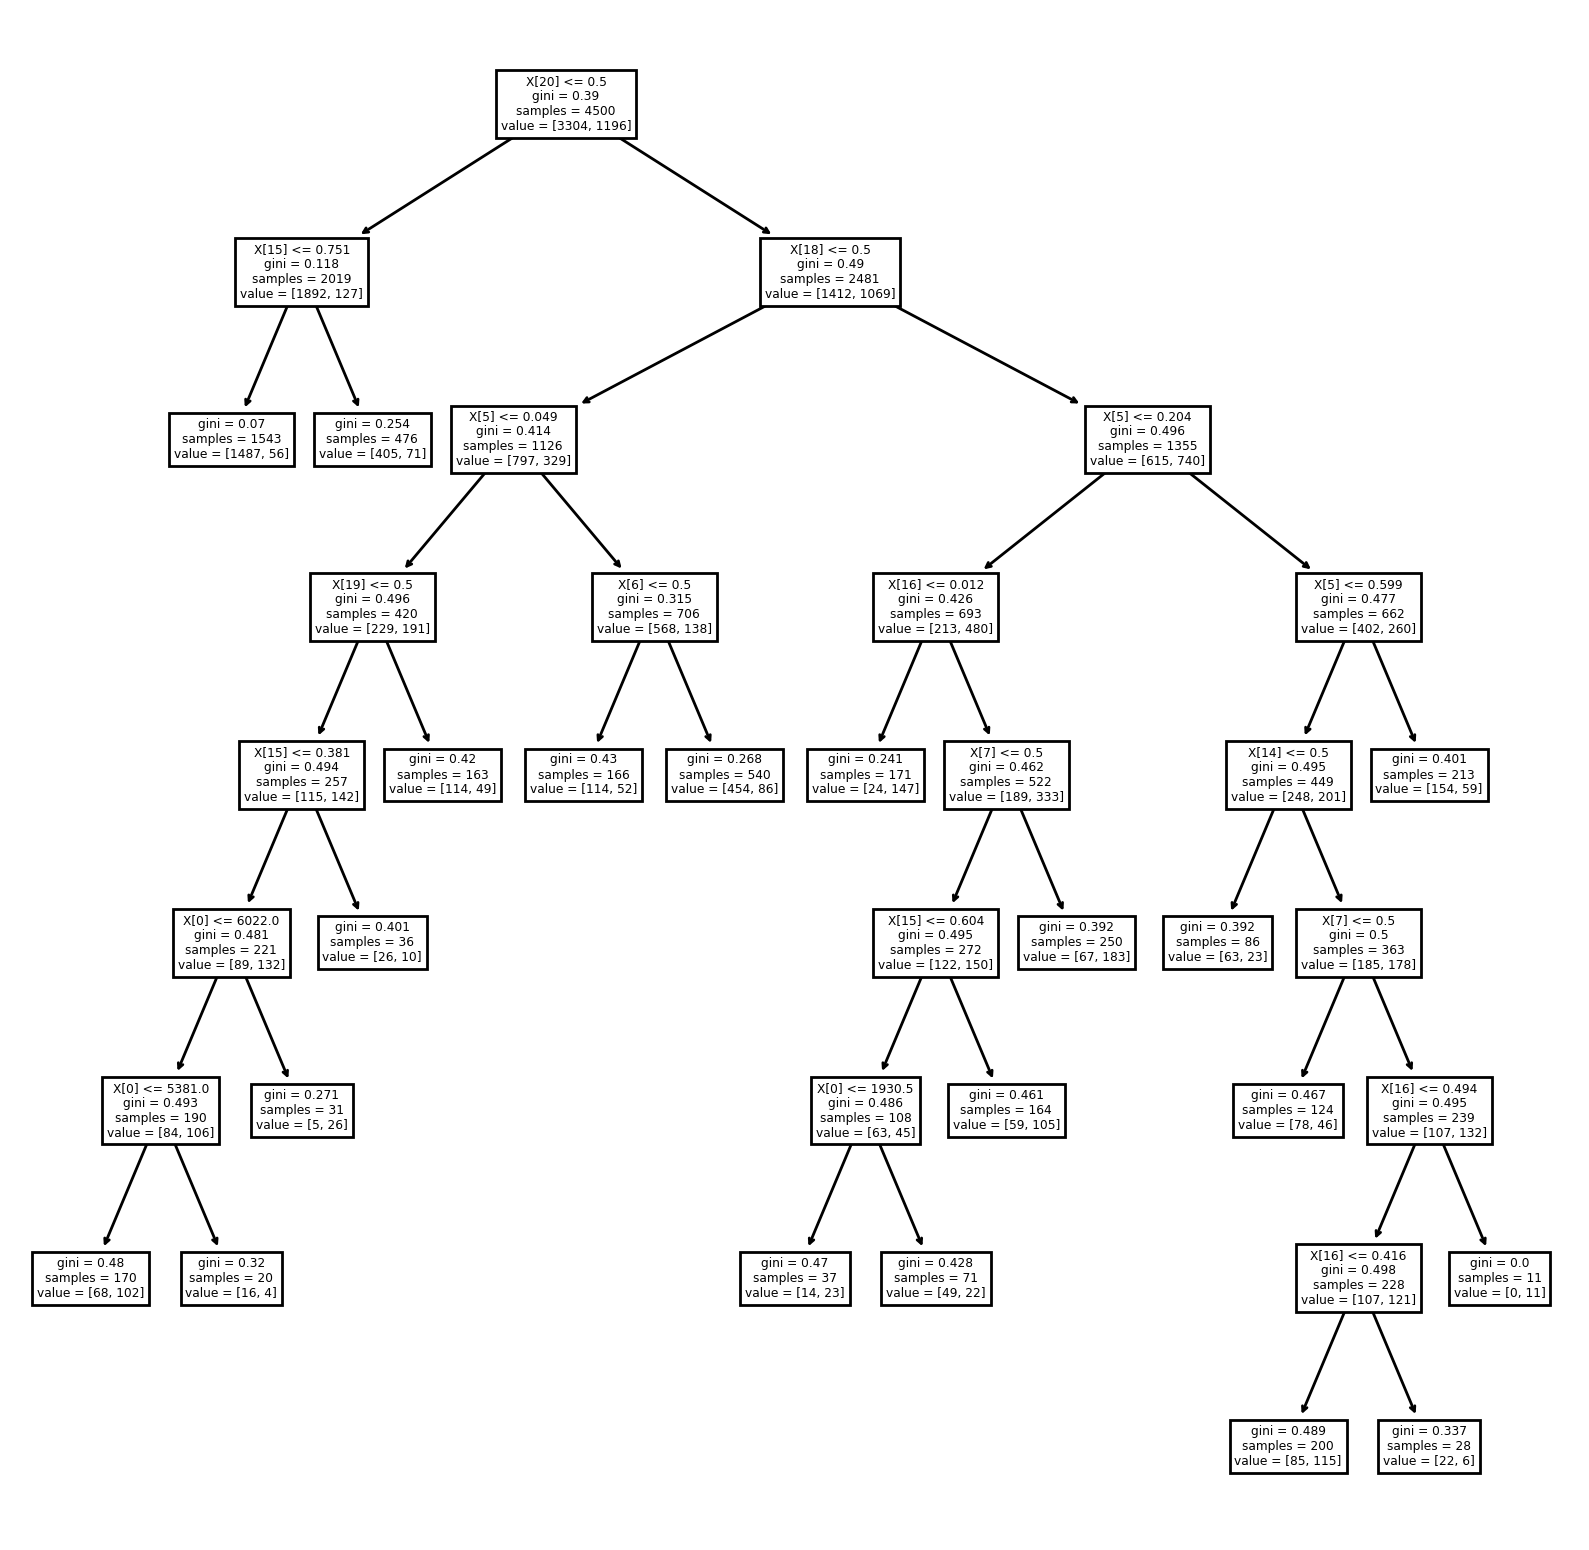

In [15]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=15,max_depth=8,max_leaf_nodes=20,min_samples_split=30)
dt = clf.fit(X_train_sub, y_train_sub)


fn=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
cn=['Churn']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)

tree.plot_tree(dt)

#Confusion Matrix
y_val_pred=dt.predict(X_val_sub)
y_test_pred=dt.predict(X_test)
cm_val_DT = confusion_matrix(y_val_sub,y_val_pred)
cm_test_DT = confusion_matrix(y_test, y_test_pred)

print("------------------Validation Set--------------")
print("Confusion Matrix")
print(cm_val_DT)
print("Model Accuracy : {}".format(dt.score(X_val_sub,y_val_sub)))
print("------------------Test Set--------------")
print("Confusion Matrix")
print(cm_test_DT)
print("Model Accuracy : {}".format(dt.score(X_test,y_test)))


In [18]:
from sklearn.metrics import f1_score

In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(solver='liblinear', random_state=15)
lm.fit(X_train_sub, y_train_sub)

#Confusion Matrix
cm_val_LR = confusion_matrix(y_val_sub, lm.predict(X_val_sub))
cm_test_LR = confusion_matrix(y_test, lm.predict(X_test))

y_val_pred = lm.predict(X_val_sub)
y_test_pred = lm.predict(X_test)

print("------------------Validation Set--------------")
print("Confusion Matrix")
print(cm_val_LR)
print("Model Accuracy : {}".format(lm.score(X_val_sub,y_val_sub)))
print("F1 score:", round(metrics.f1_score(y_val_sub, y_val_pred, pos_label='0'),3))
print("------------------Test Set--------------")
print("Confusion Matrix")
print(cm_test_LR)
print("Model Accuracy : {}".format(lm.score(X_test,y_test)))
print("F1 score:", round(metrics.f1_score(y_test, y_test_pred, pos_label='0'), 3))

------------------Validation Set--------------
Confusion Matrix
[[740  86]
 [151 148]]
Model Accuracy : 0.7893333333333333
F1 score: 0.862
------------------Test Set--------------
Confusion Matrix
[[942  91]
 [181 193]]
Model Accuracy : 0.806680881307747
F1 score: 0.874


#### Bonus: Fixed hyperparameters after multiple iterations of playing around with different hyperparameter values 

In [43]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(10,10), max_iter=300,
                  activation = 'relu', solver='sgd', learning_rate_init=0.01).fit(X_train_sub,y_train_sub)

#Confusion Matrix
mlp_train = confusion_matrix(y_val_sub, mlp.predict(X_val_sub))
mlp_test = confusion_matrix(y_test, mlp.predict(X_test))

y_val_pred = mlp.predict(X_val_sub)
y_test_pred = mlp.predict(X_test)


print("------------------Validation Set--------------")
print("Confusion Matrix")
print(mlp_train)
print("Model Accuracy : {}".format(mlp.score(X_val_sub,y_val_sub)))
print("F1 score:", round(metrics.f1_score(y_val_sub, y_val_pred, pos_label='0'),3))
print("------------------Test Set--------------")
print("Confusion Matrix")
print(mlp_test)
print("Model Accuracy : {}".format(mlp.score(X_test,y_test)))
print("F1 score:", round(metrics.f1_score(y_test, y_test_pred, pos_label='0'), 3))

------------------Validation Set--------------
Confusion Matrix
[[825   1]
 [299   0]]
Model Accuracy : 0.7333333333333333
F1 score: 0.846
------------------Test Set--------------
Confusion Matrix
[[1033    0]
 [ 374    0]]
Model Accuracy : 0.7341862117981521
F1 score: 0.847


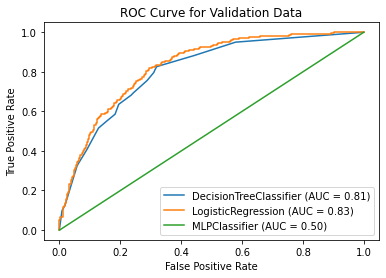

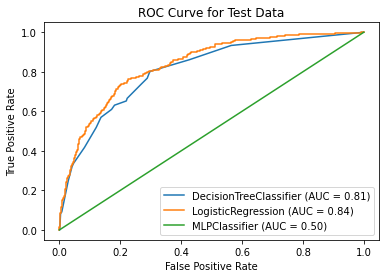

In [45]:
# Plot ROC curves
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

dt_plot=plot_roc_curve(dt, X_val_sub, y_val_sub)
lm_plot=plot_roc_curve(lm, X_val_sub, y_val_sub,ax=dt_plot.ax_)
mlp_plot=plot_roc_curve(mlp, X_val_sub, y_val_sub,ax=dt_plot.ax_)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC Curve for Validation Data")
plt.show()

dt_plot=plot_roc_curve(dt, X_test, y_test)
lm_plot=plot_roc_curve(lm, X_test, y_test,ax=dt_plot.ax_)
mlp_plot=plot_roc_curve(mlp, X_test, y_test,ax=dt_plot.ax_)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC Curve for Test Data")
plt.show()

Text(0.5, 1.0, 'Precision-Recall curves for Test Data')

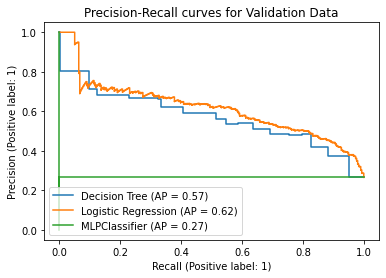

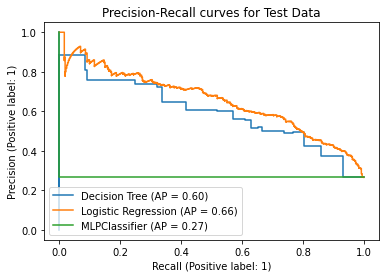

In [46]:
# Plot PR curves
from sklearn.metrics import PrecisionRecallDisplay

plot1 = PrecisionRecallDisplay.from_estimator(dt, X_val_sub, y_val_sub, name="Decision Tree")
plot2 = PrecisionRecallDisplay.from_estimator(lm, X_val_sub, y_val_sub, name="Logistic Regression",ax=plot1.ax_)
plot3 = PrecisionRecallDisplay.from_estimator(mlp, X_val_sub, y_val_sub, name="MLPClassifier",ax=plot1.ax_)
plot1.ax_.set_title("Precision-Recall curves for Validation Data")


plot1 = PrecisionRecallDisplay.from_estimator(dt, X_test, y_test, name="Decision Tree")
plot2 = PrecisionRecallDisplay.from_estimator(lm, X_test, y_test, name="Logistic Regression",ax=plot1.ax_)
plot3 = PrecisionRecallDisplay.from_estimator(mlp, X_test, y_test, name="MLPClassifier",ax=plot1.ax_)
plot1.ax_.set_title("Precision-Recall curves for Test Data")

## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [47]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=15,stratify=y)

(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# To install imbalanced-learn library use pip install imbalanced-learn command
from imblearn.over_sampling import SMOTE

# Answer here
sm = SMOTE(random_state=42)
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)
y_train_up.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [49]:
y_train_up.shape

(8260,)

(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [50]:
# Answer here
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_train_up,y_train_up, test_size=0.2,random_state=15,stratify=y_train_up)

In [51]:
# Number of classes in training Data
y_train_sm.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [52]:
# Number of classes in validation Data
y_val_sm.value_counts()

1    826
0    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

In [53]:
# Logistic Regression
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(solver='liblinear', random_state=15)
lm.fit(X_train_sm, y_train_sm)

#Confusion Matrix
cm_val_LR = confusion_matrix(y_val_sm, lm.predict(X_val_sm))
cm_test_LR = confusion_matrix(y_test, lm.predict(X_test))

y_val_pred = lm.predict(X_val_sm)
y_test_pred = lm.predict(X_test)


print("------------------Validation Set--------------")
print("Confusion Matrix")
print(cm_val_LR)
print("Model Accuracy : {}".format(lm.score(X_val_sm,y_val_sm)))
print("F1 score:", round(metrics.f1_score(y_val_sm, y_val_pred, pos_label='0'),3))
print("------------------Test Set--------------")
print("Confusion Matrix")
print(cm_test_LR)
print("Model Accuracy : {}".format(lm.score(X_test,y_test)))
print("F1 score:", round(metrics.f1_score(y_test, y_test_pred, pos_label='0'),3))

------------------Validation Set--------------
Confusion Matrix
[[688 138]
 [116 710]]
Model Accuracy : 0.8462469733656174
F1 score: 0.844
------------------Test Set--------------
Confusion Matrix
[[880 153]
 [143 231]]
Model Accuracy : 0.7896233120113717
F1 score: 0.856


In [55]:
# MLP
mlp=MLPClassifier(hidden_layer_sizes=(10,10), max_iter=300,
                  activation = 'relu', solver='sgd', learning_rate_init=0.01).fit(X_train_sm,y_train_sm)


#Confusion Matrix
mlp_val = confusion_matrix(y_val_sm, mlp.predict(X_val_sm))
mlp_test = confusion_matrix(y_test, mlp.predict(X_test))

y_val_pred = mlp.predict(X_val_sm)
y_test_pred = mlp.predict(X_test)

print("------------------Validation Set--------------")
print("Confusion Matrix")
print(mlp_val)
print("Model Accuracy : {}".format(mlp.score(X_val_sm,y_val_sm)))
print("F1 score:", round(metrics.f1_score(y_val_sm, y_val_pred, pos_label='0'),3))
print("------------------Test Set--------------")
print("Confusion Matrix")
print(mlp_test)
print("Model Accuracy : {}".format(mlp.score(X_test,y_test)))
print("F1 score:", round(metrics.f1_score(y_test, y_test_pred, pos_label='0'), 3))

------------------Validation Set--------------
Confusion Matrix
[[826   0]
 [826   0]]
Model Accuracy : 0.5
F1 score: 0.667
------------------Test Set--------------
Confusion Matrix
[[1033    0]
 [ 374    0]]
Model Accuracy : 0.7341862117981521
F1 score: 0.847


## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

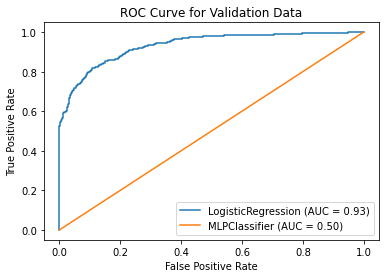

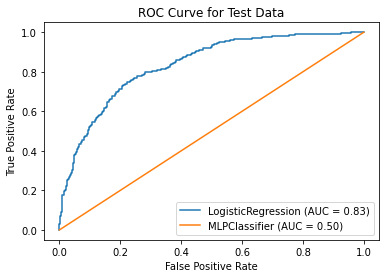

In [56]:
# Plot ROC curves
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

lm_plot=plot_roc_curve(lm, X_val_sm, y_val_sm)
mlp_plot=plot_roc_curve(mlp, X_val_sm, y_val_sm,ax=lm_plot.ax_)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC Curve for Validation Data")
plt.show()

lm_plot=plot_roc_curve(lm, X_test, y_test)
mlp_plot=plot_roc_curve(mlp, X_test, y_test,ax=lm_plot.ax_)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC Curve for Test Data")
plt.show()

Text(0.5, 1.0, 'Precision-Recall curves for Test Data')

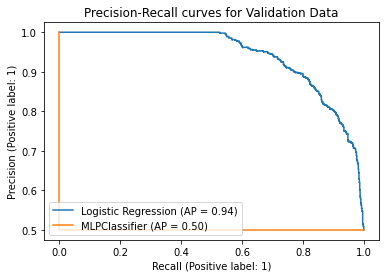

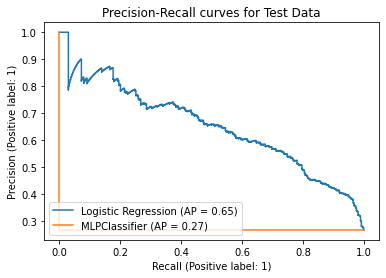

In [57]:
# Plot PR curves
from sklearn.metrics import PrecisionRecallDisplay


plot1 = PrecisionRecallDisplay.from_estimator(lm, X_val_sm, y_val_sm, name="Logistic Regression")
plot2 = PrecisionRecallDisplay.from_estimator(mlp, X_val_sm, y_val_sm, name="MLPClassifier",ax=plot1.ax_)
plot1.ax_.set_title("Precision-Recall curves for Validation Data")



plot1 = PrecisionRecallDisplay.from_estimator(lm, X_test, y_test, name="Logistic Regression")
plot2 = PrecisionRecallDisplay.from_estimator(mlp, X_test, y_test, name="MLPClassifier",ax=plot1.ax_)
plot1.ax_.set_title("Precision-Recall curves for Test Data")

c) We can see that after SMOTE, the test set's F1 results have not much improved. The models did perform significantly better on the validation set as expected. On the validation set, the ROC & PR curves resemble an ideal classifier more. Hence ROC & PR curves don't reflect the reality when it comes to comparing real dataset v/s SMOTE balanced dataset as explained in class

It is appropriate to view the models' performance on the test set as an accurate representation of the underlying issue. This is due to the fact that we are rebalancing the classes by applying SMOTE to both the training and validation datasets. Through SMOTE, we're also introducing artificial data points that might not accurately represent data from the real world.

In conclusion, SMOTE hasn't resulted in much of an improved performance.

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) [4 pts]** Find the probability that  Umbrella = 0 

**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)

#### Attached Images to canvas

# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.
*************************************

<br><br>1) In classification problems, specifically the ones that are linearly seperable, the question that comes up is how to pick a decision boundary among the many possibilities? <br><br> To understand this further, we need to first dig deeper into the concept of what a "margin" is.We're already familair with what a threshold is i.e the decision boundary. Margin is the shortest distance between the closet observation and the threshold.<br><br> Going to the original question, how does SVM seek an optimal answer? By **maximising the margin** aka decision boundary having the largest margin of error. Hence the constraints of quadratic objective function will actually be active for only these few data points close to the margin and these points are called support vector.
*************************************

2) The previously explained method does a great job of classifying all the training data accurately but the problem that arises with it is that this method is not robust to outliers and we may prefer to use **soft margins**.<br><br> To address this issue we use slack variables, slack variables help loosen some of the constraints. Basically, slack variables would allow certain constraints to be violated i.e to allow some missclassifications for the greater good. <br><br> We want the numbers of points within the margin to be as small as possible and we want their prenetration of the margin to be as small as possible. Slack variable determines the degree to which the constraint on the ith observation can be violated. Elaborating further, a slack variable will be optimised for each observation. <br><br> In conclusion, in our new optimization problem with slack variables, we are trying to maximize the margin and minimise the violation of margin constraints (i.e the use of slack variables) 
*************************************

3) Our previous discussion was limited to lineraly separated data and how to find a decision boundary for them. The SVM framework can be extended to the non-linear decision boundaries as well. 

The main idea here is that we start with data in a relatively low dimension and then move it into a higher dimension. Then finally find a support vector classifier data that would separate the higher dimension data into two groups. 

How do we go about transforming our data to make the above possible? SVM uses **Kernel Function** to systematically find support vector classifiers in higher dimensions. Counterintuitively, Kernel functions calculate the relationships between every pair of points, as though they are in the higher dimension, they don't actually do the transformation. Due to the previously mentioned trick, the computation required to transform the data from low to high dimension is avoided altogether. 

*************************************